# Preparação do estado de bit-phase-flip

In [13]:
#from sympy import conjugate
from torch.autograd import Variable
import torch
from rsvg import rsvg
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from tools import *
import sys
import pickle
import os
import cmath
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere


In [ ]:
import qiskit
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from coherence import coh_l1
from pTrace import pTraceR

# pra iniciar ambiente da tomografia
nshots = 8192
IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de')
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')

In [21]:
# Para fazer o processo para cada valor de p
list_p = np.linspace(0,1,5)
n_qubits = 2
coerencias = []
for p in list_p:
    circuit, params = vqa_bpf(n_qubits)
    target_vector, target_op = init_state_bpf(n_qubits, p)
    best_params, f = train(35, circuit, params, target_op)

    qr = QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
    #print(params.detach().numpy()[0])
    parametros = best_params.detach().numpy()
    #print(len(parametros))
    for i in range(0,24,6):
        #print(i)
        qc.rx(parametros[i],0)
        qc.ry(parametros[i+1],0)
        qc.rz(parametros[i+2],0)
        
        qc.rx(parametros[i+3],1)
        qc.ry(parametros[i+4],1)
        qc.rz(parametros[i+5],1)
        if i < 15:
            qc.cnot(0,1)
    qstc = state_tomography_circuits(qc, [qr[0],qr[1]])
    nshots = 8192
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    rho = qstf.fit(method='lstsq')
    rhoA = pTraceR(2, 2, rho)
    cA = coh_l1(rhoA)
    coerencias.append(cA)
    
    

0
6
12
18
0
6
12
18
0 0.6257057189941406
0
6
12
18
0
6
12
18
1 0.23178958892822266
0
6
12
18
0
6
12
18
2 0.046578407287597656
0
6
12
18
0
6
12
18
3 0.008973121643066406
0
6
12
18
0
6
12
18
4 0.009728431701660156
0
6
12
18
0
6
12
18
5 0.02203369140625
0
6
12
18
0
6
12
18
6 0.041657447814941406
0
6
12
18
0
6
12
18
7 0.045322418212890625
0
6
12
18
0
6
12
18
8 0.061043739318847656
0
6
12
18
0
6
12
18
9 0.031937599182128906
0
6
12
18
0
6
12
18
10 0.028873443603515625
0
6
12
18
0
6
12
18
11 0.015381813049316406
0
6
12
18
0
6
12
18
12 0.0095367431640625
0
6
12
18
0
6
12
18
13 0.014194488525390625
0
6
12
18
0
6
12
18
14 0.013962745666503906
0
6
12
18
0
6
12
18
15 0.01763916015625
0
6
12
18
0
6
12
18
16 0.0232086181640625
0
6
12
18
0
6
12
18
17 0.020051002502441406
0
6
12
18
0
6
12
18
18 0.01373291015625
0
6
12
18
0
6
12
18
19 0.012612342834472656
0
6
12
18
0
6
12
18
20 0.007554054260253906
0
6
12
18
0
6
12
18
21 0.006412506103515625
0
6
12
18
0
6
12
18
22 0.0033197402954101562
0
6
12
18
0
6
12

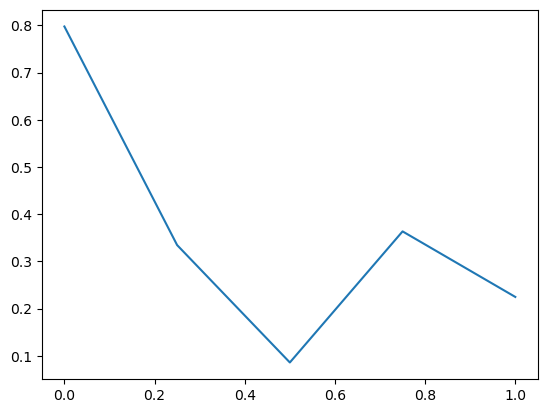

In [22]:
plt.plot(list_p,coerencias)
plt.show()

In [2]:
n_qubits = 2
circuit, params = vqa_bpf(n_qubits)
target_vector, target_op = init_state_bpf(n_qubits, 0.5)
best_params, f = train(10, circuit, params, target_op)


0
6
12
18
0
6
12
18
0 0.6909944993398751
0
6
12
18
0
6
12
18
1 0.23358050488672522
0
6
12
18
0
6
12
18
2 0.027468611210303397
0
6
12
18
0
6
12
18
3 0.0004021987203293613
0
6
12
18
0
6
12
18
4 0.006878889446596353
0
6
12
18
0
6
12
18
5 0.023137959085103906
0
6
12
18
0
6
12
18
6 0.039710445917620615
0
6
12
18
0
6
12
18
7 0.03604005076515831
0
6
12
18
0
6
12
18
8 0.03524857329699104
0
6
12
18
0
6
12
18
9 0.008340004986523592
0
6
12
18
9 0.008340004986523592


In [5]:
with open('params_nqb-2_BPF1.pkl', 'wb') as a:
        pickle.dump(best_params, a)

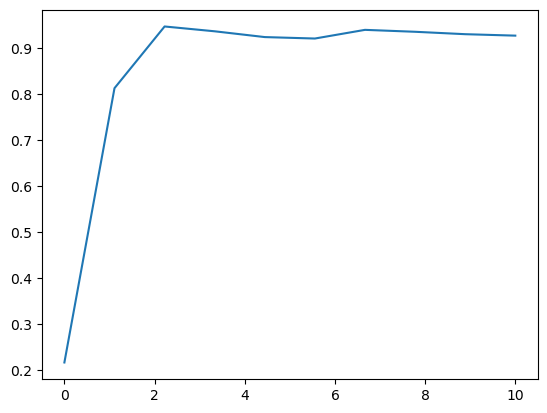

In [3]:
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

In [ ]:
#from qiskit_experiments.library import StateTomography
#from qiskit.providers.aer import AerSimulator

#beckend = Aer.get_backend('qasm_simulator')

In [4]:
import qiskit
from qiskit import *

nshots = 8192
IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de')
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor

configrc.store_credentials:WARNING:2023-02-16 13:50:42,213: Credentials already present. Set overwrite=True to overwrite.


0
6
12
18


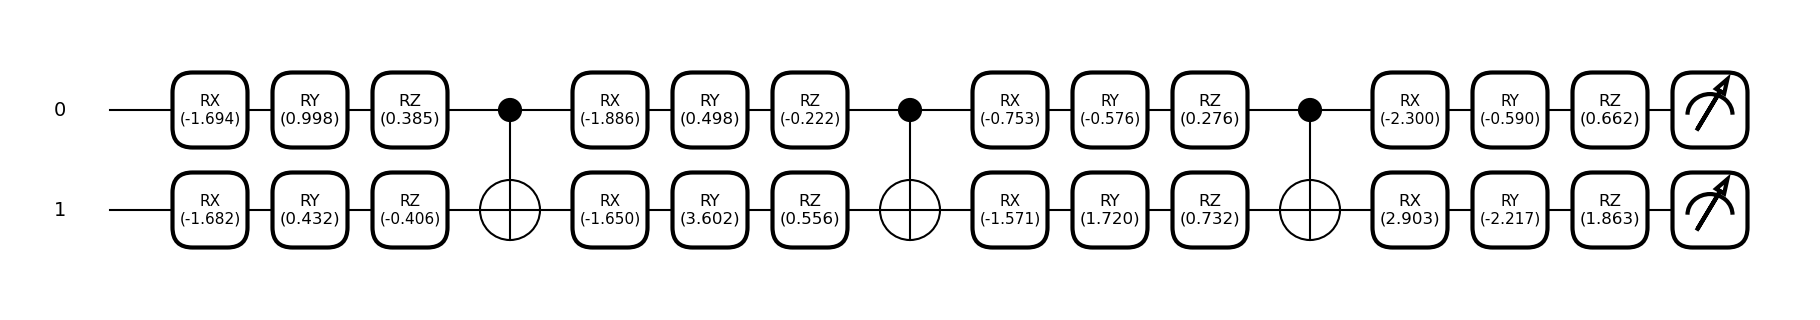

In [5]:
fig, ax = qml.draw_mpl(circuit, decimals=3)(best_params, target_op)
plt.show()

In [5]:
with open('Fidelidades_nqb-2_BPF1.pkl', 'rb') as f:
    best_params = pickle.load(f)
print(best_params)
print(len(best_params))

[0.927734375, 0.855494463683659, 0.8702003958155392, 1.0191127527212536, 0.9517138227461606, 0.9409092496643845, 1.0065191186412212, 0.98227962435546, 1.0187024483354241, 0.9370857539779589]
10


In [6]:

qr = QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
#print(params.detach().numpy()[0])
parametros = best_params.detach().numpy()
#print(len(parametros))
aux = 0
for i in range(0,24,6):
    #print(i)
    qc.rx(parametros[i],0)
    qc.ry(parametros[i+1],0)
    qc.rz(parametros[i+2],0)
    
    qc.rx(parametros[i+3],1)
    qc.ry(parametros[i+4],1)
    qc.rz(parametros[i+5],1)
    if i < 15:
        qc.cnot(0,1)
print(qc)

         ┌─────────────┐┌─────────────┐┌─────────────┐      ┌─────────────┐»
q3006_0: ┤ Rx(-1.6941) ├┤ Ry(0.99811) ├┤ Rz(0.38481) ├───■──┤ Rx(-1.8857) ├»
         └┬────────────┤├─────────────┤├─────────────┴┐┌─┴─┐├─────────────┤»
q3006_1: ─┤ Rx(-1.682) ├┤ Ry(0.43213) ├┤ Rz(-0.40637) ├┤ X ├┤ Rx(-1.6498) ├»
          └────────────┘└─────────────┘└──────────────┘└───┘└─────────────┘»
«         ┌─────────────┐┌──────────────┐     ┌──────────────┐┌──────────────┐»
«q3006_0: ┤ Ry(0.49786) ├┤ Rz(-0.22203) ├──■──┤ Rx(-0.75343) ├┤ Ry(-0.57589) ├»
«         └┬────────────┤├─────────────┬┘┌─┴─┐├─────────────┬┘└┬────────────┬┘»
«q3006_1: ─┤ Ry(3.6016) ├┤ Rz(0.55605) ├─┤ X ├┤ Rx(-1.5708) ├──┤ Ry(1.7203) ├─»
«          └────────────┘└─────────────┘ └───┘└─────────────┘  └────────────┘ »
«         ┌─────────────┐      ┌──────────┐ ┌──────────────┐┌─────────────┐
«q3006_0: ┤ Rz(0.27613) ├──■───┤ Rx(-2.3) ├─┤ Ry(-0.59026) ├┤ Rz(0.66193) ├
«         └┬────────────┤┌─┴─┐┌┴──────────┴┐├─────────────┬┘└┬─

In [7]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
qstc = state_tomography_circuits(qc, [qr[0],qr[1]])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')

rho

/tmp/ipykernel_9902/279195587.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


array([[ 0.23619292+0.j        ,  0.00164284-0.19283577j,
         0.1535461 -0.15495861j, -0.03003643+0.30476647j],
       [ 0.00164284+0.19283577j,  0.16018522+0.j        ,
         0.12866416+0.12690952j, -0.24953351-0.0247586j ],
       [ 0.1535461 +0.15495861j,  0.12866416-0.12690952j,
         0.20443277+0.j        , -0.22193469+0.17796983j],
       [-0.03003643-0.30476647j, -0.24953351+0.0247586j ,
        -0.22193469-0.17796983j,  0.39918909+0.j        ]])

In [8]:
def pTraceR(dl, dr, rhoLR):
    # Returns the right partial trace over the 'right' subsystem of rhoLR
    rhoA = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoA[j][k] += rhoLR[j*dr+l][k*dr+l]
        if j != k:
            rhoA[k][j] = np.conj(rhoA[j][k])
    return rhoA

In [9]:
rhoA = pTraceR(2, 2, rho)
rhoA

In [12]:
import math
def coh_l1(rho):  # normalized to [0,1]
    d = rho.shape[0]
    coh = 0.0
    for j in range(0, d-1):
        for k in range(j+1, d):
            coh += math.sqrt((rho[j][k].real)**2.0 + (rho[j][k].imag)**2.0)
    return 2.0*coh/(d-1)
cA = coh_l1(rhoA)
cA

0.40748919009876183

In [4]:
theta = np.linspace(0,np.pi,3)
phi = np.linspace(0,np.pi/2,3)

n = 10
n_qubits = 2
fidelidades = []
pes = np.linspace(0,1,n)
for i in range(0, n):
    circuit, params = vqa(n_qubits)
    target_vector, target_op = init_state_bpf(n_qubits, pes[i])
    best_params, f = train(15, circuit, params, target_op)
    fidelidades.append(f[-1])
    with open('Fidelidades_nqb-2_BPF1.pkl', 'wb') as a:
        pickle.dump(fidelidades, a)

0 0.8019342422485352
1 0.5595741271972656
2 0.3142127990722656
3 0.1341104507446289
4 0.0710763931274414
5 0.038529396057128906
6 0.020328521728515625
7 0.011962890625
8 0.005364418029785156
9 0.005222320556640625
10 0.006257057189941406
11 0.004281044006347656
12 0.002780914306640625
13 0.004029273986816406
14 0.006890296936035156
14 0.006890296936035156
0 0.8566724702286012
1 0.4403098056526978
2 0.15728251109873542
3 0.0519254597707173
4 0.06638103638885748
5 0.053291235437159745
6 0.08723657758714508
7 0.06235286248592883
8 0.06235286248592883
9 0.038072063371966336
10 0.03924281638305612
11 0.025405915158662865
12 0.02263828808219481
13 0.018650248463363498
14 0.0145652710937793
14 0.0145652710937793
0 0.43186350771561444
1 0.15602020557962967
2 0.04137508943328821
3 0.035450685478142854
4 0.035450685478142854
5 0.02692332324286987
6 0.016071792572261625
7 0.024341158830895982
8 0.016587188842029876
9 0.014091548013954465
10 0.01093928104186512
11 0.013150230047260335
12 0.0138531

In [8]:
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

TypeError: object of type '_io.BufferedReader' has no len()

10


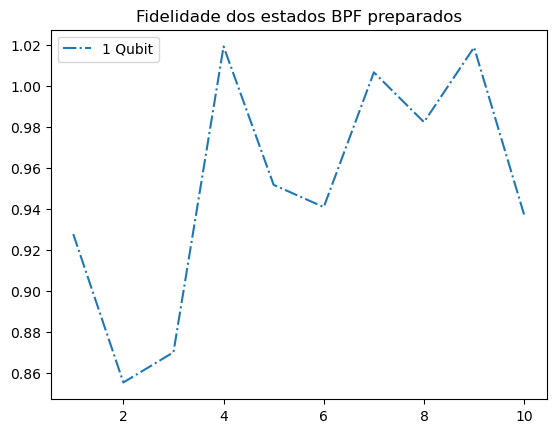

In [7]:
with open('Fidelidades_nqb-2_BPF1.pkl', 'rb') as f:
    y1 = pickle.load(f)
print(len(y1))
size = len(y1)
x = np.linspace(1, size, size)
plt.plot(x, y1[0:size], label='1 Qubit', linestyle="dashdot")
# plt.plot(x, y2[0:size], label='2 Qubit', linestyle=":")
# plt.plot(x, y3[0:size], label='3 Qubit', linestyle="--")
# plt.plot(x, y4[0:size], label='4 Qubit')
plt.title('Fidelidade dos estados BPF preparados')
#plt.ylim(0.95, 1.01)
plt.legend()
plt.show()

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


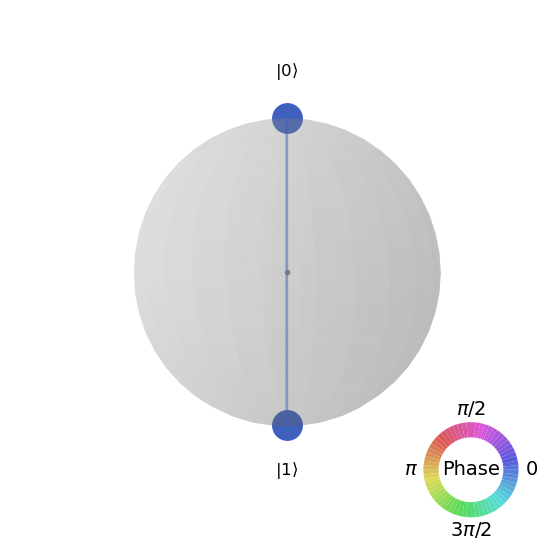

In [22]:
# TESTE COM O QISKIT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
sv=Statevector.from_label('+')
print(sv)
plot_state_qsphere(sv)

[0.5      +0.j 0.8660254+0.j]


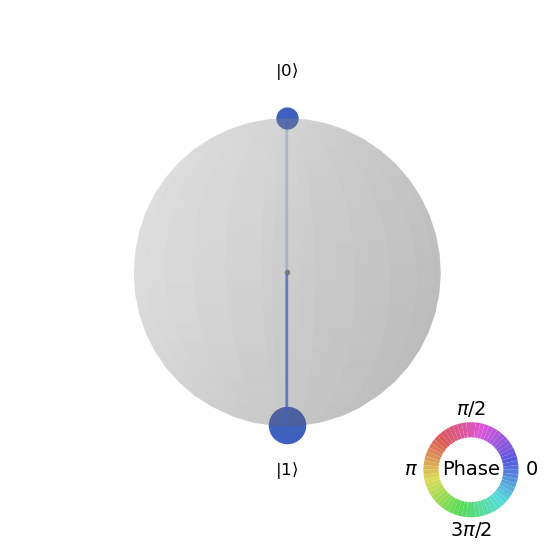

In [26]:
def general_state(theta, phi):
    state = np.zeros(2,dtype=complex)
    state[0] = np.cos(theta/2)
    state[1] = cmath.exp(1j*phi)*np.sin(theta/2)
    return state
print(general_state(np.pi/1.5,0))
sv=Statevector(general_state(np.pi/1.5,0))
plot_state_qsphere(sv)

In [9]:
import numpy as np
print(np.exp(np.float128(-10))) 
print(np.exp(np.float128(-10000)))

4.5399929762484851536e-05
1.1354838653147360985e-4343


In [5]:
def bpf(theta, phi, p):
    state = np.zeros(4,dtype=complex)
    state[0] = np.sqrt(1-p)*np.cos(theta/2)
    state[1] = cmath.exp(1j*phi)*np.sin(theta/2)
    state[2] = 1j*np.sqrt(p)*(-1)*cmath.exp(1j*phi)*np.sin(theta/2)
    state[3] = 1j*np.sqrt(p)*np.cos(theta/2)
    return state

print(bpf(np.pi/4,0,0.5))
#print(np.outer(bpf(np.pi/2,np.pi/4,0.5),bpf(np.pi/2,np.pi/4,0.5)))


[0.65328148+0.j         0.38268343+0.j         0.        -0.27059805j
 0.        +0.65328148j]


In [9]:
op = bpf(np.pi/1.5,0,0.5)
sv=Statevector(op)
plot_state_qsphere(sv)

QiskitError: 'Invalid input: not a vector or column-vector.'

NameError: name 'init_state_bpf' is not defined